# Color Generator From A String

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
color_df = pd.read_csv('data/colors.csv')
color_df.describe()

,red,green,blue
count,44547.000000,44547.000000,44547.000000
mean,164.417335,151.663120,137.233798
std,69.432207,63.755164,65.475731
min,0.000000,0.000000,0.000000
25%,115.000000,102.000000,84.000000
50%,178.000000,159.000000,139.000000
75%,224.000000,207.000000,195.000000
max,255.000000,255.000000,255.000000


In [3]:
color_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44547 entries, 0 to 44546
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    44547 non-null  object
 1   red     44547 non-null  int64 
 2   green   44547 non-null  int64 
 3   blue    44547 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.4+ MB


In [4]:
color_df.sample(10)

,name,red,green,blue
28227,Jugendstil Green,195,200,179
12508,orient,1,94,133
40148,Stone Mason,122,123,117
31686,Morbid Princess,158,14,100
29878,Looking Glass,136,135,134
39000,Skywalker Green,143,254,8
9,powder blush,247,215,215
19244,Cayman Green,73,90,68
13615,poetry plum,116,97,99
8444,skipping stone,214,208,192


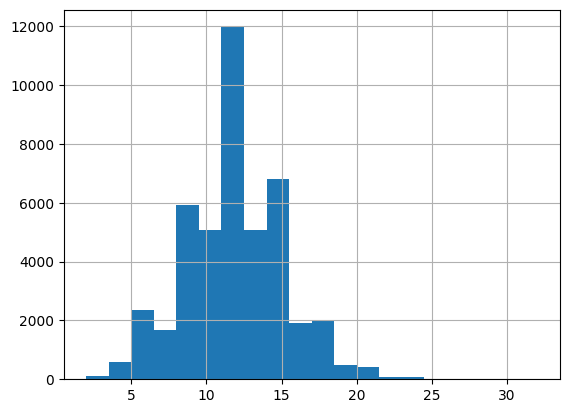

In [5]:
# make a histogram of the characters in the color name
color_df['name_length'] = color_df['name'].apply(len)
color_df['name_length'].hist(bins=20)
plt.show()

In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = 25
t = Tokenizer(char_level=True)
t.fit_on_texts(color_df['name'])
tokenized = t.texts_to_sequences(color_df['name'])
padded_names = pad_sequences(tokenized, maxlen=maxlen)


In [7]:
from tensorflow.keras.utils import to_categorical

one_hot_names = to_categorical(padded_names)


In [8]:
def norm(value):
    return value / 255.0

normalized_values = np.column_stack([norm(color_df['red']), norm(color_df['green']), norm(color_df['blue'])])

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Reshape

model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape=(maxlen, one_hot_names.shape[2])))
model.add(LSTM(128))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

history = model.fit(one_hot_names, normalized_values, epochs=40, batch_size=32, validation_split=0.1)

/Users/adrymirza/.local/share/virtualenvs/learn-color-generator-UHjBNBs0/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 48s 38ms/step - accuracy: 0.5971 - loss: 0.0634 - val_accuracy: 0.5868 - val_loss: 0.0573
Epoch 2/40
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 48s 38ms/step - accuracy: 0.6492 - loss: 0.0548 - val_accuracy: 0.6411 - val_loss: 0.0533
Epoch 3/40
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 49s 39ms/step - accuracy: 0.6569 - loss: 0.0488 - val_accuracy: 0.6458 - val_loss: 0.0494
Epoch 4/40
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 55s 44ms/step - accuracy: 0.6720 - loss: 0.0449 - val_accuracy: 0.6429 - val_loss: 0.0477
Epoch 5/40
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 53s 42ms/step - accuracy: 0.6862 - loss: 0.0416 - val_accuracy: 0.6786 - val_loss: 0.0475
Epoch 6/40
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 54s 43ms/step - accuracy: 0.6968 - loss: 0.0382 - val_accuracy: 0.6613 - val_loss: 0.0468
Epoch 7/40
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 56s 45ms/step - accuracy: 0.6970 - loss: 0.0354 - val_accuracy: 0.6626 - val_loss: 0.0453
Epoch 8/40
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 59s 47ms/step - accuracy: 0.7067 -

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
dark green, R,G,B: 11 57 21


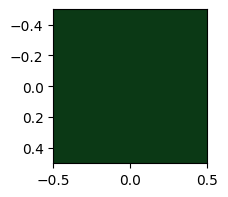

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
mustard, R,G,B: 204 180 25


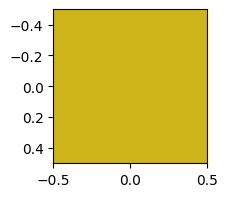

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
salmon, R,G,B: 244 114 89


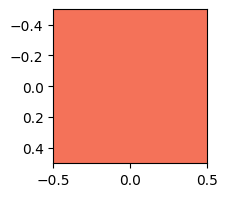

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
light blue, R,G,B: 171 221 235


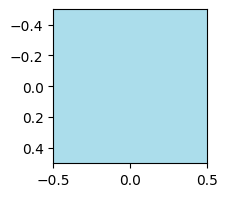

In [41]:
# plot a color image

def plot_rgb(rgb):
    data = [[rgb]]
    plt.figure(figsize=(2,2))
    plt.imshow(data, interpolation='nearest')
    plt.show()

def scale(n):
    return int(n * 255)

def predict_color(name):
    name = name.lower()
    tokenized = t.texts_to_sequences([name])
    padded = pad_sequences(tokenized, maxlen=maxlen)
    one_hot = to_categorical(padded, num_classes=len(t.word_index) + 1)  # Ensure num_classes matches tokenizer
    pred = model.predict(one_hot)[0]
    r, g, b = scale(pred[0]), scale(pred[1]), scale(pred[2])
    print(name + ',', 'R,G,B:', r,g,b)
    plot_rgb(pred)


predict_color("dark green")
predict_color("mustard")
predict_color("salmon")
predict_color("light blue")